# Data Preparation

In [1]:
import os
if os.getcwd().split('/')[-1] != 'evaluation' or os.getcwd().split('\\')[-1] != 'evaluation':
    os.chdir('..')

In [2]:
import pandas as pd

data = pd.read_csv('./images/human_eval/results/survey_results_InsertDiffusion.csv')
data.head()

,Zeitstempel,I have been informed about and understood the procedure of the study and agree to the terms presented above.,Please indicate your age,How would you describe your gender?,What is you highest educational degree?,How would you describe your current occupation?,I am very good with computers,I use computers...,I am knowledgable in generative AI,I use generative AI...,...,[Rate the general appeal of the generated image].144,[How well does the generated image match the text description on top].144,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].144,[Rate the general appeal of the generated image].145,[How well does the generated image match the text description on top].145,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].145,[Rate the general appeal of the generated image].146,[How well does the generated image match the text description on top].146,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].146,Do you have any additional comments or feedback on our study?
0,30.04.2024 16:09:45,I confirm,53,female,Master/Diploma,employed,3,daily,1,weekly,...,1 (bad),2,1 (bad),3,1 (bad),2,1 (bad),2,1 (bad),4-5 foryz notroyee maybe someone believes \non...
1,30.04.2024 18:11:53,I confirm,28,male,Master/Diploma,employed,5,daily,5,daily,...,1 (bad),4,1 (bad),3,4,2,2,4,1 (bad),NaN
2,01.05.2024 11:55:08,I confirm,22,male,Bachelor,student,5,daily,3,monthly,...,1 (bad),2,1 (bad),3,4,2,1 (bad),3,1 (bad),NaN
3,01.05.2024 13:26:24,I confirm,22,female,Bachelor,student,4,daily,4,monthly,...,1 (bad),1 (bad),1 (bad),1 (bad),2,1 (bad),1 (bad),1 (bad),1 (bad),NaN
4,01.05.2024 20:39:44,I confirm,26,male,Master/Diploma,student,4,daily,4,daily,...,1 (bad),1 (bad),1 (bad),3,4,4,2,2,1 (bad),NaN


In [3]:
df_demographic = data[['Please indicate your age', 'How would you describe your gender?', 'What is you highest educational degree?', 'How would you describe your current occupation?', 'I am very good with computers', 'I use computers...', 'I am knowledgable in generative AI', 'I use generative AI...', 'I have previously used AI background replacement and/or AI composition tools']]
df_demographic.columns = ['Age', 'Gender', 'Education', 'Occupation', 'ComputerKnowledge', 'ComputerUse', 'GenAIKnowledge', 'GenAIUse', 'ToolUse']
df_demographic.loc[:, 'Age'] = df_demographic['Age'].astype(int)
df_demographic.loc[:, 'ComputerKnowledge'] = df_demographic['ComputerKnowledge'].astype(int)
df_demographic.loc[:, 'GenAIKnowledge'] = df_demographic['GenAIKnowledge'].astype(int)
df_demographic.head()

,Age,Gender,Education,Occupation,ComputerKnowledge,ComputerUse,GenAIKnowledge,GenAIUse,ToolUse
0,53,female,Master/Diploma,employed,3,daily,1,weekly,rarely
1,28,male,Master/Diploma,employed,5,daily,5,daily,never
2,22,male,Bachelor,student,5,daily,3,monthly,often
3,22,female,Bachelor,student,4,daily,4,monthly,rarely
4,26,male,Master/Diploma,student,4,daily,4,daily,rarely


In [4]:
columns_rating = [x for x in data.columns if '[' in x]
df_ratings = data[columns_rating]
df_ratings.head()

,[Rate the general appeal of the generated image],[How well does the generated image match the text description on top],[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image],[Rate the general appeal of the generated image].1,[How well does the generated image match the text description on top].1,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].1,[Rate the general appeal of the generated image].2,[How well does the generated image match the text description on top].2,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].2,[Rate the general appeal of the generated image].3,...,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].143,[Rate the general appeal of the generated image].144,[How well does the generated image match the text description on top].144,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].144,[Rate the general appeal of the generated image].145,[How well does the generated image match the text description on top].145,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].145,[Rate the general appeal of the generated image].146,[How well does the generated image match the text description on top].146,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].146
0,4,2,5 (great),5 (great),5 (great),2,3,2,5 (great),4,...,5 (great),1 (bad),2,1 (bad),3,1 (bad),2,1 (bad),2,1 (bad)
1,4,1 (bad),5 (great),4,5 (great),3,3,4,3,4,...,5 (great),1 (bad),4,1 (bad),3,4,2,2,4,1 (bad)
2,4,2,5 (great),4,4,2,5 (great),3,3,3,...,4,1 (bad),2,1 (bad),3,4,2,1 (bad),3,1 (bad)
3,4,1 (bad),3,5 (great),4,1 (bad),3,4,3,4,...,4,1 (bad),1 (bad),1 (bad),1 (bad),2,1 (bad),1 (bad),1 (bad),1 (bad)
4,5 (great),3,4,3,3,2,5 (great),4,3,3,...,3,1 (bad),1 (bad),1 (bad),3,4,4,2,2,1 (bad)


In [5]:
def remove_text(x):
    if type(x) != str:
        return x
    return x.replace(' (bad)', '').replace(' (great)', '')

df_ratings = df_ratings.applymap(remove_text)
df_ratings = df_ratings.astype(int)
df_ratings.head()

,[Rate the general appeal of the generated image],[How well does the generated image match the text description on top],[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image],[Rate the general appeal of the generated image].1,[How well does the generated image match the text description on top].1,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].1,[Rate the general appeal of the generated image].2,[How well does the generated image match the text description on top].2,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].2,[Rate the general appeal of the generated image].3,...,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].143,[Rate the general appeal of the generated image].144,[How well does the generated image match the text description on top].144,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].144,[Rate the general appeal of the generated image].145,[How well does the generated image match the text description on top].145,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].145,[Rate the general appeal of the generated image].146,[How well does the generated image match the text description on top].146,[How well is the geometry of the (main) object in the (left) reference image maintained in the generated image].146
0,4,2,5,5,5,2,3,2,5,4,...,5,1,2,1,3,1,2,1,2,1
1,4,1,5,4,5,3,3,4,3,4,...,5,1,4,1,3,4,2,2,4,1
2,4,2,5,4,4,2,5,3,3,3,...,4,1,2,1,3,4,2,1,3,1
3,4,1,3,5,4,1,3,4,3,4,...,4,1,1,1,1,2,1,1,1,1
4,5,3,4,3,3,2,5,4,3,3,...,3,1,1,1,3,4,4,2,2,1


In [6]:
# change column names
new_column_names = []
NUM_IMAGES = 7

for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_bg_Ours', 'PromptAlignment_bg_Ours', 'Consistency_bg_Ours']
for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_bg_Interactive', 'PromptAlignment_bg_Interactive', 'Consistency_bg_Interactive']
for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_bg_ReplaceAnything', 'PromptAlignment_bg_ReplaceAnything', 'Consistency_bg_ReplaceAnything']
for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_bg_Shopify', 'PromptAlignment_bg_Shopify', 'Consistency_bg_Shopify']
for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_comp_AnyDoor', 'PromptAlignment_comp_AnyDoor', 'Consistency_comp_AnyDoor']
for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_comp_Ours', 'PromptAlignment_comp_Ours', 'Consistency_comp_Ours']
for _ in range(NUM_IMAGES*3):
    new_column_names = new_column_names + ['GeneralAppeal_comp_TFI', 'PromptAlignment_comp_TFI', 'Consistency_comp_TFI']

# orders from questionnaire
bg_order = [
    'bike_1',
    'product_1',
    'bike_2',
    'product_2',
    'car_1',
    'product_3',
    'product_4',
    'product_5',
    'bike_3',
    'product_6',
    'car_2',
    'car_3',
    'bike_4',
    'bike_5',
    'bike_6',
    'product_7',
    'car_4',
    'car_5',
    'bike_7',
    'car_6',
    'car_7',
]

comp_order = [
    'product_1',
    'bike_1',
    'bike_2',
    'bike_3',
    'bike_4',
    'car_1',
    'bike_5',
    'product_2',
    'car_2',
    'car_3',
    'car_4',
    'car_5',
    'product_3',
    'product_4',
    'product_5',
    'car_6',
    'product_6',
    'car_7',
    'bike_6',
    'product_7',
    'bike_7',
]

# fixing some issues for the composition as something went wrong with the orders there
def swap_elements(l: list, pos1: int, pos2: int):
    l[pos1], l[pos2] = l[pos2], l[pos1]
    return l
comp_order_anydoor = comp_order.copy()
comp_order_anydoor = swap_elements(comp_order_anydoor, 14, 15)
comp_order_anydoor[1] = 'TO_DROP'

comp_order_ours = comp_order.copy()
comp_order_ours[-1] = 'TO_DROP'

comp_order_tfi = comp_order.copy()
comp_order_tfi[-1] = 'TO_DROP'

comp_orders = [comp_order, comp_order_ours, comp_order_tfi]

cp_bg_order = []
for i in range(4):
    for x in bg_order:
        for j in range(3):
            cp_bg_order.append(x)


cp_comp_order = []
for c_comp_order in comp_orders:
    for x in c_comp_order:
        cp_comp_order = cp_comp_order + [x, x, x]

for i, x in enumerate(new_column_names):
    if '_bg_' in x:
        new_column_names[i] = x + '_' + cp_bg_order.pop(0)
    elif '_comp_' in x:
        new_column_names[i] = x + '_' + cp_comp_order.pop(0)
    else:
        raise AssertionError()

df_ratings.columns = new_column_names
columns_to_drop = [x for x in df_ratings.columns if 'TO_DROP' in x]
df_ratings = df_ratings.drop(columns=columns_to_drop)
df_ratings.head()

,GeneralAppeal_bg_Ours_bike_1,PromptAlignment_bg_Ours_bike_1,Consistency_bg_Ours_bike_1,GeneralAppeal_bg_Ours_product_1,PromptAlignment_bg_Ours_product_1,Consistency_bg_Ours_product_1,GeneralAppeal_bg_Ours_bike_2,PromptAlignment_bg_Ours_bike_2,Consistency_bg_Ours_bike_2,GeneralAppeal_bg_Ours_product_2,...,Consistency_comp_TFI_product_6,GeneralAppeal_comp_TFI_car_7,PromptAlignment_comp_TFI_car_7,Consistency_comp_TFI_car_7,GeneralAppeal_comp_TFI_bike_6,PromptAlignment_comp_TFI_bike_6,Consistency_comp_TFI_bike_6,GeneralAppeal_comp_TFI_product_7,PromptAlignment_comp_TFI_product_7,Consistency_comp_TFI_product_7
0,4,2,5,5,5,2,3,2,5,4,...,1,5,5,5,1,2,1,3,1,2
1,4,1,5,4,5,3,3,4,3,4,...,2,4,5,5,1,4,1,3,4,2
2,4,2,5,4,4,2,5,3,3,3,...,1,3,5,4,1,2,1,3,4,2
3,4,1,3,5,4,1,3,4,3,4,...,1,3,4,4,1,1,1,1,2,1
4,5,3,4,3,3,2,5,4,3,3,...,1,3,3,3,1,1,1,3,4,4


# Demographic Analysis

In [7]:
description = df_demographic.describe()
description

,Age,ComputerKnowledge,GenAIKnowledge
count,15.000000,15.000000,15.000000
mean,29.066667,4.133333,3.066667
std,12.068061,0.915475,1.533747
min,22.000000,3.000000,1.000000
25%,23.000000,3.000000,1.500000
50%,26.000000,4.000000,3.000000
75%,27.000000,5.000000,4.000000
max,63.000000,5.000000,5.000000


In [8]:
description.to_dict()

{'Age': {'count': 15.0,
  'mean': 29.066666666666666,
  'std': 12.068060956015067,
  'min': 22.0,
  '25%': 23.0,
  '50%': 26.0,
  '75%': 27.0,
  'max': 63.0},
 'ComputerKnowledge': {'count': 15.0,
  'mean': 4.133333333333334,
  'std': 0.9154754164341269,
  'min': 3.0,
  '25%': 3.0,
  '50%': 4.0,
  '75%': 5.0,
  'max': 5.0},
 'GenAIKnowledge': {'count': 15.0,
  'mean': 3.066666666666667,
  'std': 1.533747356112131,
  'min': 1.0,
  '25%': 1.5,
  '50%': 3.0,
  '75%': 4.0,
  'max': 5.0}}

In [9]:
remaining_columns = [x for x in df_demographic.columns if x not in description.columns]

results = {}
for c in remaining_columns:
    results[c] = df_demographic[c].value_counts().to_dict()
results

{'Gender': {'male': 9, 'female': 5, 'prefer not to say': 1},
 'Education': {'Master/Diploma': 7,
  'Bachelor': 5,
  'Abitur': 2,
  'Abgeschlossene Berufsausbildung': 1},
 'Occupation': {'student': 10, 'employed': 5},
 'ComputerUse': {'daily': 13, 'weekly': 2},
 'GenAIUse': {'daily': 4,
  'almost never': 4,
  'weekly': 3,
  'monthly': 3,
  'yearly': 1},
 'ToolUse': {'rarely': 6, 'never': 6, 'often': 3}}

# Rating Analysis

## Background Replacement

In [10]:
df_ratings.head()

,GeneralAppeal_bg_Ours_bike_1,PromptAlignment_bg_Ours_bike_1,Consistency_bg_Ours_bike_1,GeneralAppeal_bg_Ours_product_1,PromptAlignment_bg_Ours_product_1,Consistency_bg_Ours_product_1,GeneralAppeal_bg_Ours_bike_2,PromptAlignment_bg_Ours_bike_2,Consistency_bg_Ours_bike_2,GeneralAppeal_bg_Ours_product_2,...,Consistency_comp_TFI_product_6,GeneralAppeal_comp_TFI_car_7,PromptAlignment_comp_TFI_car_7,Consistency_comp_TFI_car_7,GeneralAppeal_comp_TFI_bike_6,PromptAlignment_comp_TFI_bike_6,Consistency_comp_TFI_bike_6,GeneralAppeal_comp_TFI_product_7,PromptAlignment_comp_TFI_product_7,Consistency_comp_TFI_product_7
0,4,2,5,5,5,2,3,2,5,4,...,1,5,5,5,1,2,1,3,1,2
1,4,1,5,4,5,3,3,4,3,4,...,2,4,5,5,1,4,1,3,4,2
2,4,2,5,4,4,2,5,3,3,3,...,1,3,5,4,1,2,1,3,4,2
3,4,1,3,5,4,1,3,4,3,4,...,1,3,4,4,1,1,1,1,2,1
4,5,3,4,3,3,2,5,4,3,3,...,1,3,3,3,1,1,1,3,4,4


In [11]:
columns_bg = [x for x in df_ratings.columns if '_bg_' in x]
df_ratings_bg = df_ratings[columns_bg]

methods = set()
metrics = set()
datasets = set()
for x in columns_bg:
    splits = x.split('_')
    metric = splits[0]
    method = splits[2]
    dataset = splits[3]
    metrics.add(metric)
    methods.add(method)
    datasets.add(dataset)
methods = list(methods)
metrics = list(metrics)
dataset = list(datasets)

In [12]:
import numpy as np
results = {}

for method in methods:
    for metric in metrics:
        relevant_columns = [x for x in df_ratings_bg.columns if method in x and metric in x]
        for dataset in datasets:
            c_columns = [x for x in relevant_columns if dataset in x]
            mean = np.mean(df_ratings_bg[c_columns].to_numpy())
            std = np.std(df_ratings_bg[c_columns].to_numpy())
            results[method + '_' + dataset + '_' + metric + '_mean'] = mean
            results[method + '_' + dataset + '_' + metric + '_std'] = std
        mean = np.mean(df_ratings_bg[relevant_columns].to_numpy())
        std = np.std(df_ratings_bg[relevant_columns].to_numpy())
        results[method + '_overall_' + metric + '_mean'] = mean
        results[method + '_overall_' + metric + '_std'] = std

metric_results = {}
for metric in metrics:
    metric_results[metric] = {x.replace('_' + metric, ''): results[x] for x in results.keys() if metric in x}

ds_results = {}
for dataset in list(datasets)+['overall']:
    for metric in metric_results:
        ds_results[dataset+metric] = {x.replace('_'+ dataset, ''): metric_results[metric][x] for x in metric_results[metric].keys() if dataset in x}

df_bg_results = pd.DataFrame.from_dict(ds_results)
row_order = ["Shopify_mean", "Shopify_std", "ReplaceAnything_mean", "ReplaceAnything_std", "Ours_mean", "Ours_std", "Interactive_mean", "Interactive_std"]
df_bg_results = df_bg_results.reindex(sorted(df_bg_results.columns), axis=1)
df_bg_results = df_bg_results.reindex(row_order)
df_bg_results

,bikeConsistency,bikeGeneralAppeal,bikePromptAlignment,carConsistency,carGeneralAppeal,carPromptAlignment,overallConsistency,overallGeneralAppeal,overallPromptAlignment,productConsistency,productGeneralAppeal,productPromptAlignment
Shopify_mean,2.761905,1.609524,2.466667,3.619048,2.152381,2.828571,3.396825,2.015873,2.685714,3.809524,2.285714,2.761905
Shopify_std,1.369907,0.910209,1.163465,1.488886,1.255699,1.327060,1.462111,1.209645,1.314010,1.302710,1.314493,1.411003
ReplaceAnything_mean,3.485714,1.657143,2.914286,4.609524,3.761905,3.971429,4.139683,3.053968,3.600000,4.323810,3.742857,3.914286
ReplaceAnything_std,1.401457,0.826105,1.235308,0.654584,1.055812,0.960725,1.181678,1.423256,1.249254,1.055554,1.163153,1.235308
Ours_mean,3.419048,4.180952,3.971429,3.971429,3.990476,4.085714,3.498413,3.917460,3.904762,3.104762,3.580952,3.657143
Ours_std,1.185475,0.892092,1.090715,0.798298,0.889036,1.043020,1.201519,1.020199,1.186087,1.379605,1.161124,1.358070
Interactive_mean,4.047619,4.238095,4.542857,3.895238,3.514286,3.961905,3.717460,3.819048,4.085714,3.209524,3.704762,3.752381
Interactive_std,0.898474,0.834081,0.676526,0.955424,1.122194,0.945403,1.123845,1.061125,1.027689,1.292434,1.068366,1.217186


In [13]:
dataset = 'car'
columns = [x for x in df_bg_results.columns if dataset in x]
curr = df_bg_results[columns]
curr

,carConsistency,carGeneralAppeal,carPromptAlignment
Shopify_mean,3.619048,2.152381,2.828571
Shopify_std,1.488886,1.255699,1.327060
ReplaceAnything_mean,4.609524,3.761905,3.971429
ReplaceAnything_std,0.654584,1.055812,0.960725
Ours_mean,3.971429,3.990476,4.085714
Ours_std,0.798298,0.889036,1.043020
Interactive_mean,3.895238,3.514286,3.961905
Interactive_std,0.955424,1.122194,0.945403


<Axes: title={'center': 'car'}>

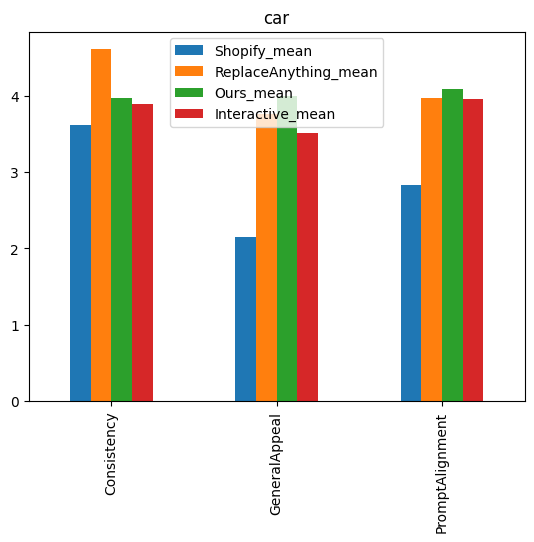

In [14]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

In [15]:
dataset = 'bike'
columns = [x for x in df_bg_results.columns if dataset in x]
curr = df_bg_results[columns]
curr

,bikeConsistency,bikeGeneralAppeal,bikePromptAlignment
Shopify_mean,2.761905,1.609524,2.466667
Shopify_std,1.369907,0.910209,1.163465
ReplaceAnything_mean,3.485714,1.657143,2.914286
ReplaceAnything_std,1.401457,0.826105,1.235308
Ours_mean,3.419048,4.180952,3.971429
Ours_std,1.185475,0.892092,1.090715
Interactive_mean,4.047619,4.238095,4.542857
Interactive_std,0.898474,0.834081,0.676526


<Axes: title={'center': 'bike'}>

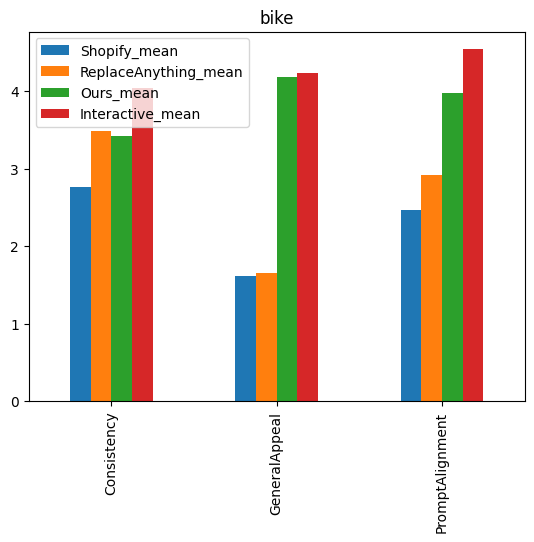

In [16]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

In [17]:
dataset = 'product'
columns = [x for x in df_bg_results.columns if dataset in x]
curr = df_bg_results[columns]
curr

,productConsistency,productGeneralAppeal,productPromptAlignment
Shopify_mean,3.809524,2.285714,2.761905
Shopify_std,1.302710,1.314493,1.411003
ReplaceAnything_mean,4.323810,3.742857,3.914286
ReplaceAnything_std,1.055554,1.163153,1.235308
Ours_mean,3.104762,3.580952,3.657143
Ours_std,1.379605,1.161124,1.358070
Interactive_mean,3.209524,3.704762,3.752381
Interactive_std,1.292434,1.068366,1.217186


<Axes: title={'center': 'product'}>

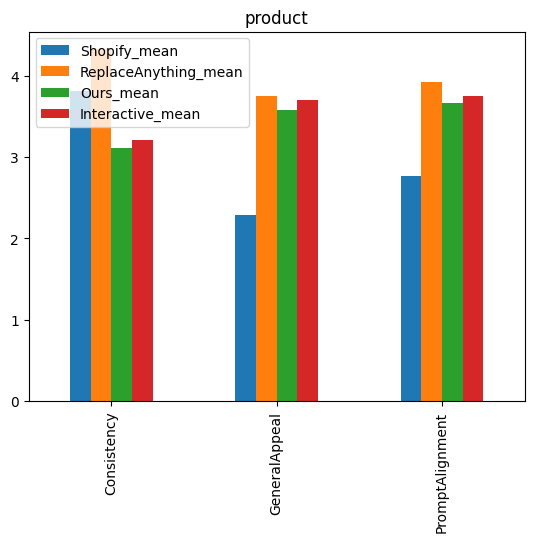

In [18]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

In [19]:
dataset = 'overall'
columns = [x for x in df_bg_results.columns if dataset in x]
curr = df_bg_results[columns]
curr

,overallConsistency,overallGeneralAppeal,overallPromptAlignment
Shopify_mean,3.396825,2.015873,2.685714
Shopify_std,1.462111,1.209645,1.314010
ReplaceAnything_mean,4.139683,3.053968,3.600000
ReplaceAnything_std,1.181678,1.423256,1.249254
Ours_mean,3.498413,3.917460,3.904762
Ours_std,1.201519,1.020199,1.186087
Interactive_mean,3.717460,3.819048,4.085714
Interactive_std,1.123845,1.061125,1.027689


<Axes: title={'center': 'overall'}>

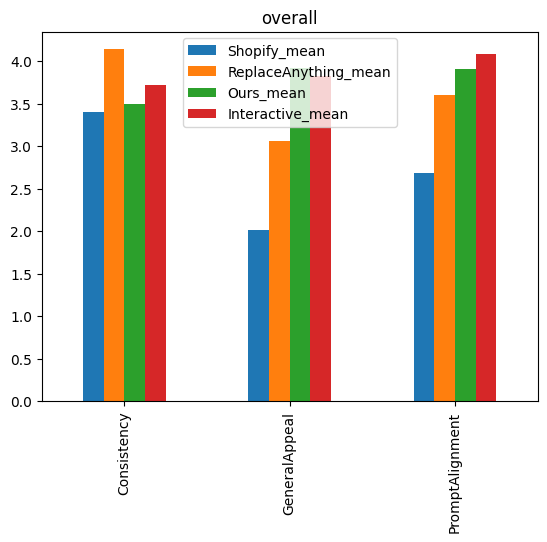

In [20]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

## Composition

In [21]:
columns_comp = [x for x in df_ratings.columns if '_comp_' in x]
df_ratings_comp = df_ratings[columns_comp]

methods = set()
metrics = set()
datasets = set()
for x in columns_comp:
    splits = x.split('_')
    metric = splits[0]
    method = splits[2]
    dataset = splits[3]
    metrics.add(metric)
    methods.add(method)
    datasets.add(dataset)
methods = list(methods)
metrics = list(metrics)
datasets = list(datasets)

In [22]:
results = {}

for method in methods:
   for metric in metrics:
       relevant_columns = [x for x in df_ratings_comp.columns if method in x and metric in x]
       mean = np.mean(df_ratings_comp[relevant_columns].to_numpy())
       std = np.std(df_ratings_comp[relevant_columns].to_numpy())
       for dataset in datasets:
           c_columns = [x for x in relevant_columns if dataset in x]
           mean = np.mean(df_ratings_comp[c_columns].to_numpy())
           std = np.std(df_ratings_comp[c_columns].to_numpy())
           results[method + '_' + dataset + '_' + metric + '_mean'] = mean
           results[method + '_' + dataset + '_' + metric + '_std'] = std
       results[method + '_overall_' + metric + '_mean'] = mean
       results[method + '_overall_' + metric + '_std'] = std

metric_results = {metric: {x.replace('_'+ metric, ''): results[x] for x in results.keys() if metric in x} for metric in metrics}

ds_results = {dataset+metric: {x.replace('_'+ dataset, ''): metric_results[metric][x] for x in metric_results[metric].keys() if dataset in x} for dataset in list(datasets)+['overall'] for metric in metrics}

df_comp_results = pd.DataFrame.from_dict(ds_results)
row_order = ["TFI_mean", "TFI_std", "AnyDoor_mean", "AnyDoor_std", "Ours_mean", "Ours_std"]
df_comp_results = df_comp_results.sort_index(axis=1).loc[row_order]
df_comp_results

,bikeConsistency,bikeGeneralAppeal,bikePromptAlignment,carConsistency,carGeneralAppeal,carPromptAlignment,overallConsistency,overallGeneralAppeal,overallPromptAlignment,productConsistency,productGeneralAppeal,productPromptAlignment
TFI_mean,1.155556,1.711111,2.033333,3.333333,2.780952,3.752381,3.333333,2.780952,3.752381,1.895238,2.742857,3.247619
TFI_std,0.419288,1.035422,1.242310,1.299573,1.137926,1.185475,1.299573,1.137926,1.185475,1.022823,1.154936,1.336527
AnyDoor_mean,2.114286,2.038095,2.714286,1.695238,1.904762,2.761905,1.695238,1.904762,2.761905,2.257143,2.342857,2.895238
AnyDoor_std,1.157290,0.994497,1.321718,0.782229,0.951428,1.298525,0.782229,0.951428,1.298525,1.338290,1.209711,1.492354
Ours_mean,3.433333,3.211111,3.900000,3.790476,3.409524,3.790476,3.790476,3.409524,3.790476,3.695238,3.571429,4.161905
Ours_std,1.075484,1.251616,1.075484,1.110086,1.110086,1.143888,1.110086,1.110086,1.143888,1.122275,1.209936,0.967312


In [23]:
dataset = 'car'
columns = [x for x in df_comp_results.columns if dataset in x]
curr = df_comp_results[columns]
curr

,carConsistency,carGeneralAppeal,carPromptAlignment
TFI_mean,3.333333,2.780952,3.752381
TFI_std,1.299573,1.137926,1.185475
AnyDoor_mean,1.695238,1.904762,2.761905
AnyDoor_std,0.782229,0.951428,1.298525
Ours_mean,3.790476,3.409524,3.790476
Ours_std,1.110086,1.110086,1.143888


<Axes: title={'center': 'car'}>

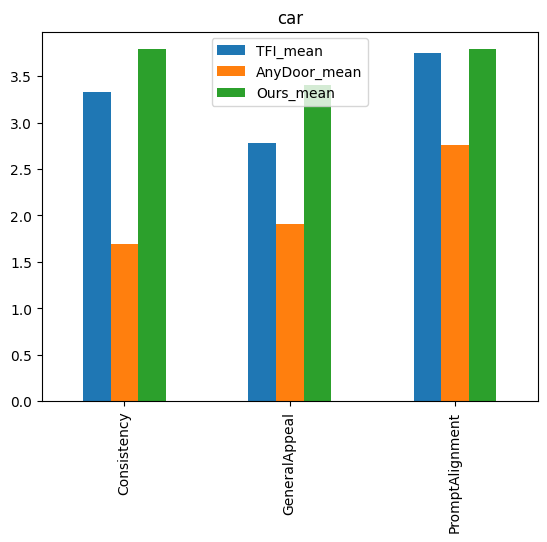

In [24]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

In [25]:
dataset = 'bike'
columns = [x for x in df_comp_results.columns if dataset in x]
curr = df_comp_results[columns]
curr

,bikeConsistency,bikeGeneralAppeal,bikePromptAlignment
TFI_mean,1.155556,1.711111,2.033333
TFI_std,0.419288,1.035422,1.242310
AnyDoor_mean,2.114286,2.038095,2.714286
AnyDoor_std,1.157290,0.994497,1.321718
Ours_mean,3.433333,3.211111,3.900000
Ours_std,1.075484,1.251616,1.075484


<Axes: title={'center': 'bike'}>

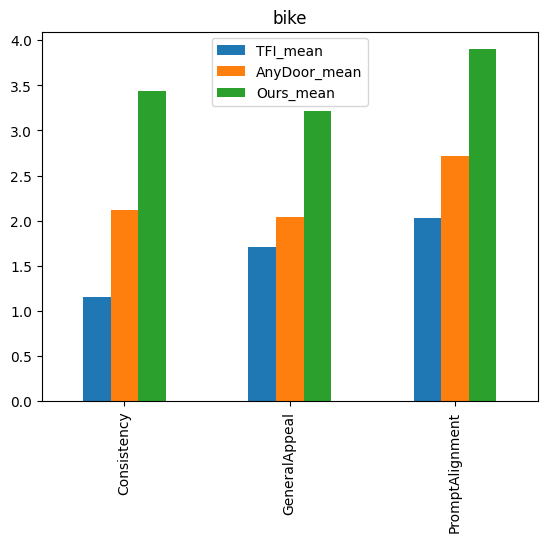

In [26]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

In [27]:
dataset = 'product'
columns = [x for x in df_comp_results.columns if dataset in x]
curr = df_comp_results[columns]
curr

,productConsistency,productGeneralAppeal,productPromptAlignment
TFI_mean,1.895238,2.742857,3.247619
TFI_std,1.022823,1.154936,1.336527
AnyDoor_mean,2.257143,2.342857,2.895238
AnyDoor_std,1.338290,1.209711,1.492354
Ours_mean,3.695238,3.571429,4.161905
Ours_std,1.122275,1.209936,0.967312


<Axes: title={'center': 'product'}>

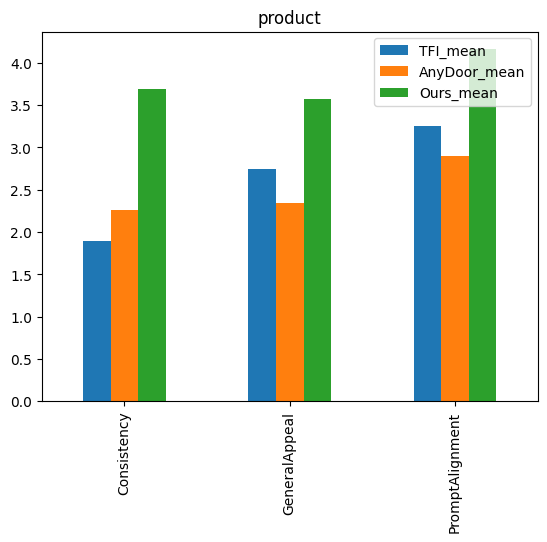

In [28]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

In [29]:
dataset = 'overall'
columns = [x for x in df_comp_results.columns if dataset in x]
curr = df_comp_results[columns]
curr

,overallConsistency,overallGeneralAppeal,overallPromptAlignment
TFI_mean,3.333333,2.780952,3.752381
TFI_std,1.299573,1.137926,1.185475
AnyDoor_mean,1.695238,1.904762,2.761905
AnyDoor_std,0.782229,0.951428,1.298525
Ours_mean,3.790476,3.409524,3.790476
Ours_std,1.110086,1.110086,1.143888


<Axes: title={'center': 'overall'}>

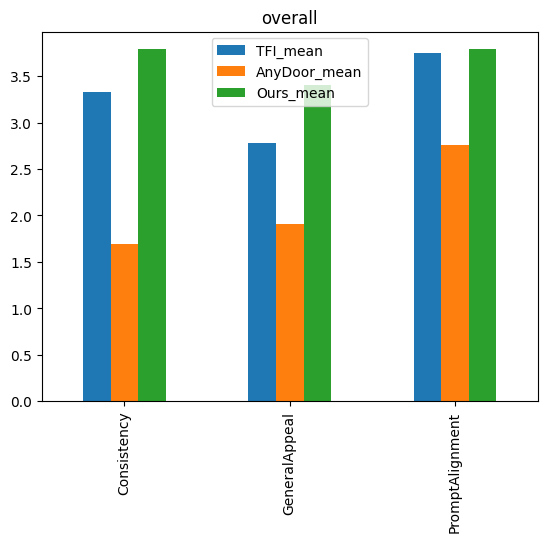

In [30]:
curr[curr.index.str.contains('mean')].transpose().rename({dataset+'Consistency': 'Consistency', dataset+'GeneralAppeal': 'GeneralAppeal', dataset+'PromptAlignment': 'PromptAlignment'}).plot.bar(title=dataset)

# Inferential Statistics
According to ChatGPT and StatistikGuru we should conduct a repeated measures within subject ANOVA.

According to StatistikGuru a normal distribution is typically considered a requirement for using an ANOVA. However, multiple papers and simulations ([1](doi:10.1111/j.1469-8986.1987.tb00324.x), [2](doi:10.1177/00131640021970961)) have shown that the results from a repeated measures ANOVA are robust to violations of this requirement (for >30 participants) making a test for a normal distribution unnecessary (but still nice).

A test for normal distribution would be the Shapiro-Wilk test (if the result is < 0.05 the data is not normally distributed, if it is > 0.05 we can assume a gaussian distribution).

A generalization of ANOVA that does not assume a gaussian distribution is the Friedmann test.

In [31]:
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import json
import pingouin as pg
import random

def clean_rows(data: pd.DataFrame, methods: list):
    method_columns = [[x.split('_')[-1] for x in data.columns if m in x] for m in methods]
    sets = [set(x) for x in method_columns]
    union_set = set().union(*sets)
    intersection_set = set.intersection(*sets)
    not_in_all = list(union_set - intersection_set)
    columns_to_drop = [x for x in data.columns if x.split('_')[-1] in not_in_all]
    data = data.drop(columns=columns_to_drop)
    return data

def conduct_inferential_statistics(data: pd.DataFrame, methods: list, alpha: float=0.05):
    data = clean_rows(data, methods)
    data['pid'] = range(1, len(data) + 1)

    df_long = pd.wide_to_long(data, stubnames=[m+'_' for m in methods], i='pid', j='image')
    rename_dict = {x: x[:-1] for x in df_long.columns}
    df_long = df_long.rename(columns=rename_dict)
    df_long = df_long.reset_index()
    
    df_pg = data.melt(id_vars=['pid'], var_name='image', value_name='rating')
    df_pg[['method', 'image_index']] = df_pg['image'].str.split('_', expand=True)
    df_pg.drop(columns='image', inplace=True)
    df_pg = df_pg[['pid', 'image_index', 'method', 'rating']]
    normality_test = pg.normality(data=df_pg, group='method', dv='rating', method='shapiro')
    normality_test = normality_test.reset_index()
    normality = normality_test['normal'].all()

    if normality:
        # print('Normality statisfied, conducting rm ANOVA')
        aov = pg.rm_anova(data=df_pg, subject='pid', dv='rating', within='method', correction=True)
    else:
        # print('Normality violated, conducting Friedmann test')
        aov = pg.friedman(data=df_pg, subject='pid', dv='rating', within='method', method='f')
        aov = aov.reset_index()

    p_anova = aov.loc[0, 'p-unc']
    sphericity = True
    if normality:
        if not aov.loc[0, 'sphericity']:
            sphericity = False
            # print('sphericity violated using Greenhouse-Geiser correction')
            p_anova = aov.loc[0, 'p-GG-corr']

    posthoc_results = []
    for i in range(len(methods)):
        for j in range(i+1, len(methods)):
            t_stat, p_val = ttest_rel(df_long[methods[i]], df_long[methods[j]])
            posthoc_results.append((methods[i], methods[j], t_stat, p_val))
    posthoc_corrected = [{'method1': m1, 'method2': m2, 't-statistic': t, 'corrected p': p * len(posthoc_results), 'significant?': bool(p *len(posthoc_results) < alpha)} for m1, m2, t, p in posthoc_results]

    return {
        'MainEffect': {
            'F': {
                'dof_numerator': aov.loc[0, "ddof1"],
                'dof_denominator': aov.loc[0, "ddof2"],
                'f-statistic': aov.loc[0, "F"]
            },
            'p': p_anova,
            'correction': 'Greenhouse-Geiser' if not sphericity else 'None',
            'test': 'ANOVA' if normality else 'Friedmann',
            'significant': bool(p_anova < alpha)
        },
        'PostHoc': posthoc_corrected
    }

# assumes column names 'metric_method_i'
def conduct_test_for_all_metrics(data: pd.DataFrame, methods: list, alpha: float=0.05):
    columns = list(data.columns)
    metrics = set()
    for c in columns:
        metrics.add(c.split('_')[0])
    metrics = list(metrics)
    results = {}
    for metric in metrics:
        relevant_columns = [x for x in columns if metric in x]
        df_curr = data[relevant_columns]
        rename_dict = {c: c.split('_')[1] + '_' + c.split('_')[-1] for c in relevant_columns}
        df_curr = df_curr.rename(columns=rename_dict)
        results[metric] = conduct_inferential_statistics(df_curr, methods, alpha)
    return results

# expects column names 'metric_method_dataset_i'
def conduct_test_for_dataset(data: pd.DataFrame, dataset: str, methods: list, alpha: float=0.05):
    columns = list(data.columns)
    if dataset != 'overall':
        relevant_columns = [c for c in columns if dataset in c]
    else:
        relevant_columns = columns
    df_curr = data[relevant_columns]
    rename_dict = {c: c.split('_')[0] + '_' + c.split('_')[1] + '_' + c.split('_')[-1] for c in df_curr.columns}
    df_curr = df_curr.rename(columns=rename_dict)
    return conduct_test_for_all_metrics(df_curr, methods, alpha)

# expects column names 'metric_method_dataset_i'
def conduct_test_for_all_datasets(data: pd.DataFrame, methods: list, alpha: float=0.05):
    columns = list(data.columns)
    datasets = set()
    for c in columns:
        datasets.add(c.split('_')[2])
    datasets = list(datasets) + ['overall']
    results = {}
    for ds in datasets:
        results[ds] = conduct_test_for_dataset(data, ds, methods, alpha)
    return results
    
# expects column names 'metric_mode_method_dataset_i'
def conduct_test_for_modes(data: pd.DataFrame, alpha: float=0.05, save_path: str='./images/human_eval/results/inferential.json'):
    os.makedirs('/'.join(save_path.split('/')[-1]), exist_ok=True)
    columns = list(data.columns)
    modes = set()
    for c in columns:
        modes.add(c.split('_')[1])
    modes = list(modes)
    print(modes)
    results = {}
    for mode in modes:
        relevant_columns = [x for x in columns if mode in x]
        df_curr = data[relevant_columns]
        rename_dict = {x: '_'.join([x.split('_')[0], x.split('_')[2], x.split('_')[3], x.split('_')[4]]) for x in df_curr.columns}
        df_curr = df_curr.rename(columns=rename_dict)

        methods = set()
        for c in df_curr.columns:
            methods.add(c.split('_')[1])
        methods = list(methods)
        print(f'mode: {mode} - methods: {methods}')

        results[mode] = conduct_test_for_all_datasets(df_curr, methods, alpha)
    
    print(results)

    with open(save_path, 'w') as f:
        json.dump(results, f)
    return results

In [32]:
# conduct_test_for_modes(df_fake_ratings[[x for x in df_fake_ratings.columns if 'bg' in x and 'car' in x and 'PromptAlignment' in x]])
conduct_test_for_modes(df_ratings)

['bg', 'comp']
mode: bg - methods: ['Ours', 'Shopify', 'ReplaceAnything', 'Interactive']
mode: comp - methods: ['Ours', 'TFI', 'AnyDoor']
{'bg': {'bike': {'GeneralAppeal': {'MainEffect': {'F': {'dof_numerator': 2.8666666666666667, 'dof_denominator': 40.13333333333333, 'f-statistic': 63.95454545454544}, 'p': 4.210367895696361e-15, 'correction': 'None', 'test': 'Friedmann', 'significant': True}, 'PostHoc': [{'method1': 'Ours', 'method2': 'Shopify', 't-statistic': 19.612688093338335, 'corrected p': 6.010206981098599e-36, 'significant?': True}, {'method1': 'Ours', 'method2': 'ReplaceAnything', 't-statistic': 21.52021951124806, 'corrected p': 2.5600454188181782e-39, 'significant?': True}, {'method1': 'Ours', 'method2': 'Interactive', 't-statistic': -0.5285069593560098, 'corrected p': 3.589641354684669, 'significant?': False}, {'method1': 'Shopify', 'method2': 'ReplaceAnything', 't-statistic': -0.47714856498243674, 'corrected p': 3.805544994951622, 'significant?': False}, {'method1': 'Shopif

{'bg': {'bike': {'GeneralAppeal': {'MainEffect': {'F': {'dof_numerator': 2.8666666666666667,
      'dof_denominator': 40.13333333333333,
      'f-statistic': 63.95454545454544},
     'p': 4.210367895696361e-15,
     'correction': 'None',
     'test': 'Friedmann',
     'significant': True},
    'PostHoc': [{'method1': 'Ours',
      'method2': 'Shopify',
      't-statistic': 19.612688093338335,
      'corrected p': 6.010206981098599e-36,
      'significant?': True},
     {'method1': 'Ours',
      'method2': 'ReplaceAnything',
      't-statistic': 21.52021951124806,
      'corrected p': 2.5600454188181782e-39,
      'significant?': True},
     {'method1': 'Ours',
      'method2': 'Interactive',
      't-statistic': -0.5285069593560098,
      'corrected p': 3.589641354684669,
      'significant?': False},
     {'method1': 'Shopify',
      'method2': 'ReplaceAnything',
      't-statistic': -0.47714856498243674,
      'corrected p': 3.805544994951622,
      'significant?': False},
     {'met